# Master Thesis:

Dataset: https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation

In [997]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')

# Ignore neural networks warnings - max iter count.
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [998]:
dataset = pd.read_csv('Dataset.csv')

dataset.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# EDA

In [999]:
dataset.shape

(10129, 19)

In [1000]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [1001]:
dataset.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

### Dropping the irrelevant columns . **** REVIEW

In [1002]:
cols_to_drop = ['Date','Time']

dataset.drop(cols_to_drop,axis=1,inplace=True)

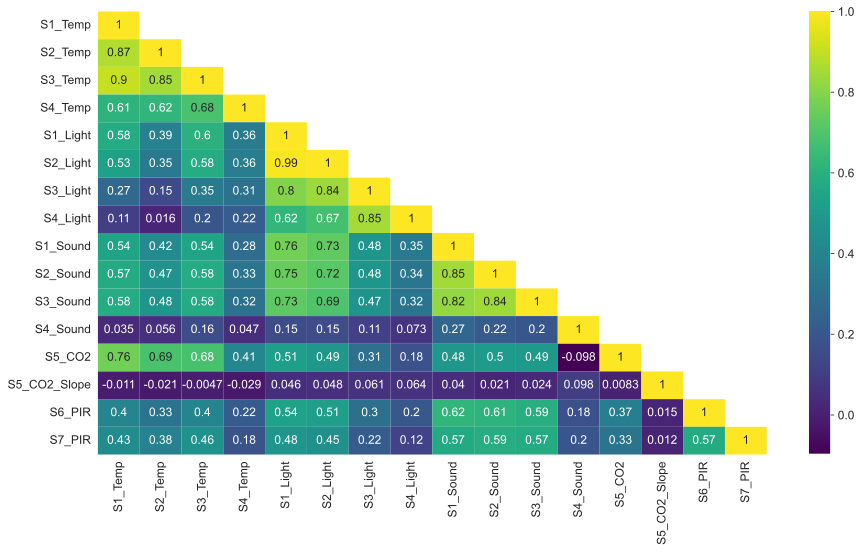

In [1076]:
plt.subplots(figsize=(15,8))
corr = dataset.drop('Room_Occupancy_Count',axis=1).corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

cmap = sns.color_palette(palette="viridis", as_cmap=True)
cmap.set_bad("white")

ax = sns.heatmap(corr,annot=True,cmap=cmap, mask=mask)

## Checking Null Values

In [1004]:
dataset.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

In [1005]:
dataset.isnull().sum()

S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

## No Null values found

In [1006]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


## Analysing relation of Temp, Light, CO2, PIR and Sound with Number of Occupants:

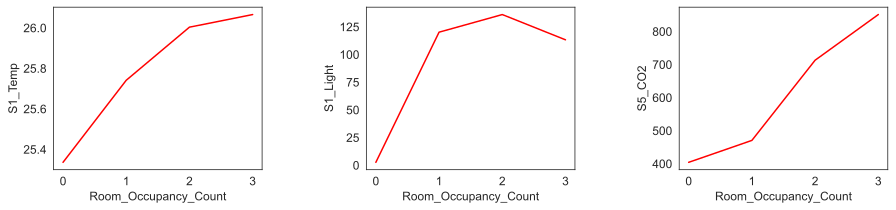

In [1007]:
variables = ['S1_Temp','S1_Light','S5_CO2']
# variables = ['S1_Temp','S1_Light', 'S3_Sound']

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap.set_bad("white")
sns.set_style(style='white')
for i in range(0,len(variables)):
    plt.subplot(3,3,i+1)
    sns.lineplot(data=dataset, x='Room_Occupancy_Count',y=dataset[variables[i]], color='red', errorbar=None)

### Checking for outliers

In [1008]:
dataset.columns

Index(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR', 'Room_Occupancy_Count'],
      dtype='object')

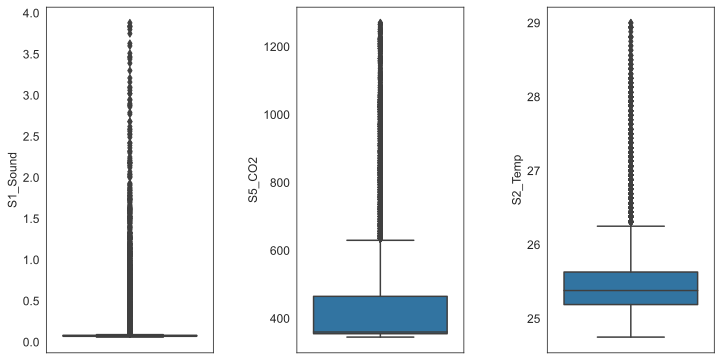

In [1009]:
# cols = ['S1_Temp', 'S2_Temp', 'S1_Light', 'S4_Light', 'S5_CO2', 'S1_Sound']
cols = ['S1_Sound', 'S5_CO2', 'S2_Temp']
# cols = ['S1_Temp', 'S1_Light', 'S2_Sound']

plt.figure(figsize=(12,20))
plt.subplots_adjust(hspace=0.1,wspace=0.5)

for i in range(0,len(cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=dataset[cols[i]])



### IQR function 

In [1010]:
outlier = []

def outlier_iqr(data): # Detecting outlier using IQR 
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    higher_fence = q3+(1.5*iqr)
    
    for index,row in data.items():
        if row < lower_fence or row > higher_fence:
            outlier.append(row)
    return outlier

In [1011]:
cols = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

In [1012]:
for col in cols:
    outlier_iqr(dataset[col])
    col_mean = dataset[col].mean()
    for i in outlier:
         dataset[col] = dataset[col].replace(i,col_mean)

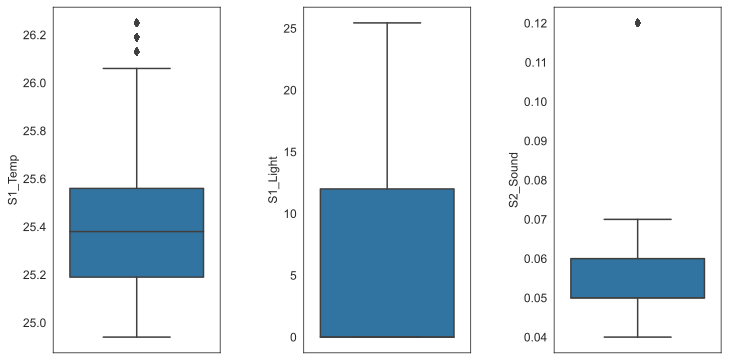

In [1013]:
# cols = ['S1_Temp', 'S2_Temp', 'S1_Light', 'S4_Light', 'S5_CO2', 'S1_Sound']
# cols = ['S1_Sound', 'S5_CO2', 'S2_Temp']
cols = ['S1_Temp', 'S1_Light', 'S2_Sound']
plt.figure(figsize=(12,20))
plt.subplots_adjust(hspace=0.1,wspace=0.5)
for i in range(0,len(cols)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=dataset[cols[i]])

## Target Value Counts:

In [1014]:
dataset['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

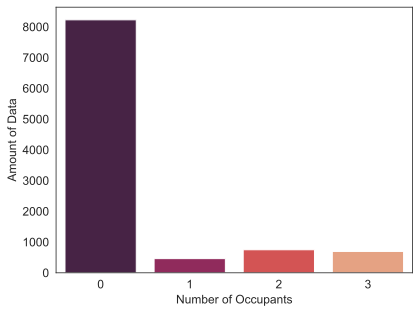

In [1015]:
room_values = dataset['Room_Occupancy_Count'].value_counts()
order_to_show = room_values.index.sort_values()
sns.barplot(x=room_values.index, y=room_values.values, order=order_to_show, palette='rocket')
plt.title('')
# plt.ylabel('Quantidade de dados')
# plt.xlabel('Quantidade de ocupantes')
plt.ylabel('Amount of Data')
plt.xlabel('Number of Occupants')
plt.show()

# sns.countplot(dataset['Room_Occupancy_Count'])
#
# plt.title('Value Counts for the Target Variable')
# plt.xlabel('No. of Occupants')
# plt.show()

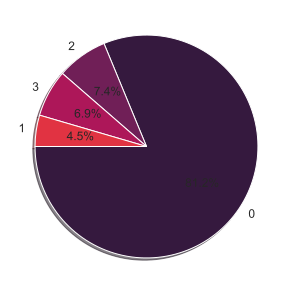

In [1016]:
occupants = dict(dataset['Room_Occupancy_Count'].value_counts())
labels = []
value = []

for keys, values in occupants.items():
    labels.append(keys)
    value.append(values)

plt.subplots(figsize=(5,6))

plt.pie(x=value,labels=labels,autopct='%1.1f%%',shadow=True,startangle=180,colors=sns.color_palette('rocket'))

plt.show()

In [1017]:
value_count_percent = round(100* dataset['Room_Occupancy_Count'].value_counts() / len(dataset['Room_Occupancy_Count']),3)

print(value_count_percent)

Room_Occupancy_Count
0    81.232
2     7.385
3     6.852
1     4.532
Name: count, dtype: float64


## Data prepration for train, test, smote and normalization

In [1018]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline

In [1019]:
X = dataset.drop('Room_Occupancy_Count',axis=1)
y = dataset['Room_Occupancy_Count']

In [1020]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR
0,24.94,24.75,24.56,25.38,25.445059,34.0,53.0,13.220259,0.080000,0.120066,0.060000,0.06000,390.0,-0.00483,0.0,0.0
1,24.94,24.75,24.56,25.44,25.445059,33.0,53.0,13.220259,0.168178,0.050000,0.060000,0.06000,390.0,-0.00483,0.0,0.0
2,25.00,24.75,24.50,25.44,25.445059,34.0,53.0,13.220259,0.168178,0.120066,0.158119,0.06000,390.0,-0.00483,0.0,0.0
3,25.00,24.75,24.56,25.44,25.445059,34.0,53.0,13.220259,0.168178,0.120066,0.158119,0.10384,390.0,-0.00483,0.0,0.0
4,25.00,24.75,24.56,25.44,25.445059,34.0,54.0,13.220259,0.168178,0.060000,0.060000,0.06000,390.0,-0.00483,0.0,0.0


In [1021]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.10,random_state=0) # Validação - teste - final - conjunto de dados que não será considerado durante o treinamento.
# X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.20,random_state=0) holdout

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

Shape of X_train: (9116, 16)
Shape of X_test: (1013, 16)


In [1022]:
print(y_train.value_counts())

print(y_test.value_counts())

Room_Occupancy_Count
0    7402
2     667
3     636
1     411
Name: count, dtype: int64
Room_Occupancy_Count
0    826
2     81
3     58
1     48
Name: count, dtype: int64


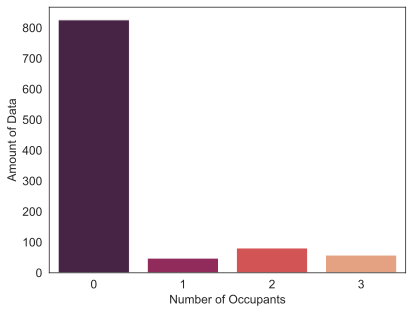

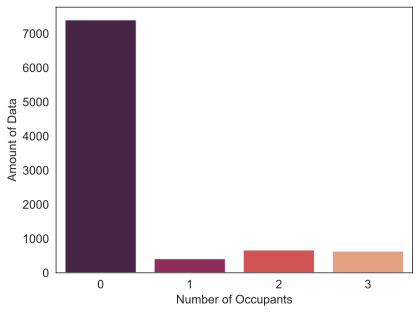

In [1023]:
y_test_values = y_test.value_counts()
y_train_values = y_train.value_counts()
order_to_show1 = y_test_values.index.sort_values()
sns.barplot(x=y_test_values.index, y=y_test_values.values, order=order_to_show1, palette='rocket')
# plt.title('Amostragem de testes')
# plt.ylabel('Quantidade de dados')
# plt.xlabel('Quantidade de ocupantes')
plt.ylabel('Amount of Data')
plt.xlabel('Number of Occupants')
plt.show()
order_to_show2 = y_train_values.index.sort_values()
overlapPlot = (y_train_values.index, y_train_values.values, order_to_show2)
sns.barplot(x=y_train_values.index, y=y_train_values.values, order=order_to_show2, palette='rocket')
# plt.title('Amostragem desbalanceada para treinamento do modelo')
# plt.ylabel('Quantidade de dados')
# plt.xlabel('Quantidade de ocupantes')
plt.ylabel('Amount of Data')
plt.xlabel('Number of Occupants')
plt.show()

### Using Smote to oversample

In [1024]:
smote = SMOTE()

In [1025]:
X_train_smt,y_train_smt = smote.fit_resample(X_train,y_train)
# X_train_smt = X_train
# y_train_smt = y_train


In [1026]:
print(f'Shape of X_train_smt: {X_train_smt.shape}')
print(f'Shape of y_train_smt: {y_train_smt.shape}')
print(f'\nValueCounts: \n{y_train_smt.value_counts()}')

Shape of X_train_smt: (29608, 16)
Shape of y_train_smt: (29608,)

ValueCounts: 
Room_Occupancy_Count
0    7402
3    7402
2    7402
1    7402
Name: count, dtype: int64


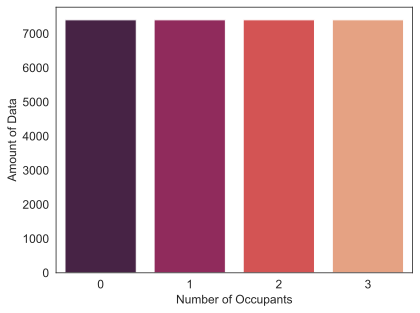

[0, 6735, 6766, 6991]
      0     1     2     3
0  7402   667   636   411
1     0  6735  6766  6991


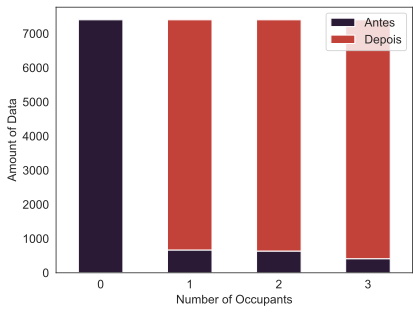

In [1027]:
y_test_values = y_train_smt.value_counts()
order_to_show3 = y_test_values.index.sort_values()
sns.barplot(x=y_test_values.index, y=y_test_values.values, order=order_to_show3, palette='rocket')
# plt.title('Amostragem balanceada para treinamento do modelo')
# plt.ylabel('Quantidade de dados')
# plt.xlabel('Quantidade de ocupantes')
plt.ylabel('Amount of Data')
plt.xlabel('Number of Occupants')
plt.show()

# ax = plt.subplots()
# overlapPlot = (y_train_values.index, y_train_values.values, order_to_show2)
test1 = pd.DataFrame(data=[],columns=['0','1','2','3'])
valuesFF = []
for index, value in enumerate(overlapPlot[1].tolist()):
    valuesFF.append(y_test_values.values.tolist()[index] - value)

print(valuesFF)
test1.loc[len(test1)] = overlapPlot[1].tolist()
test1.loc[len(test1)] = valuesFF
print(test1)
test1.T.plot(kind='bar', stacked=True, color=[(42/255,26/255,53/255,1.000),(194/255,66/255,58/255,1.000)], rot=0)
plt.legend(['Antes', 'Depois'], loc='upper right')
# plt.ylabel('Quantidade de dados')
# plt.xlabel('Quantidade de ocupantes')
plt.ylabel('Amount of Data')
plt.xlabel('Number of Occupants')
plt.tick_params(axis='x',width=50.0)
# plt.re(ticklabelstep=1)
# plt.xticks([0,1,2,3])

# plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# plt.show()

## Model Building - Decision Tree Classifier

In [1028]:
from sklearn.tree import DecisionTreeClassifier

In [1029]:
pipeline = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.96930574, 0.97839097, 0.98445564, 0.98036731, 0.9743216 ])

In [1030]:
dt_clf = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
dt_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [1031]:
dt_pred = dt_clf.predict(X_test)

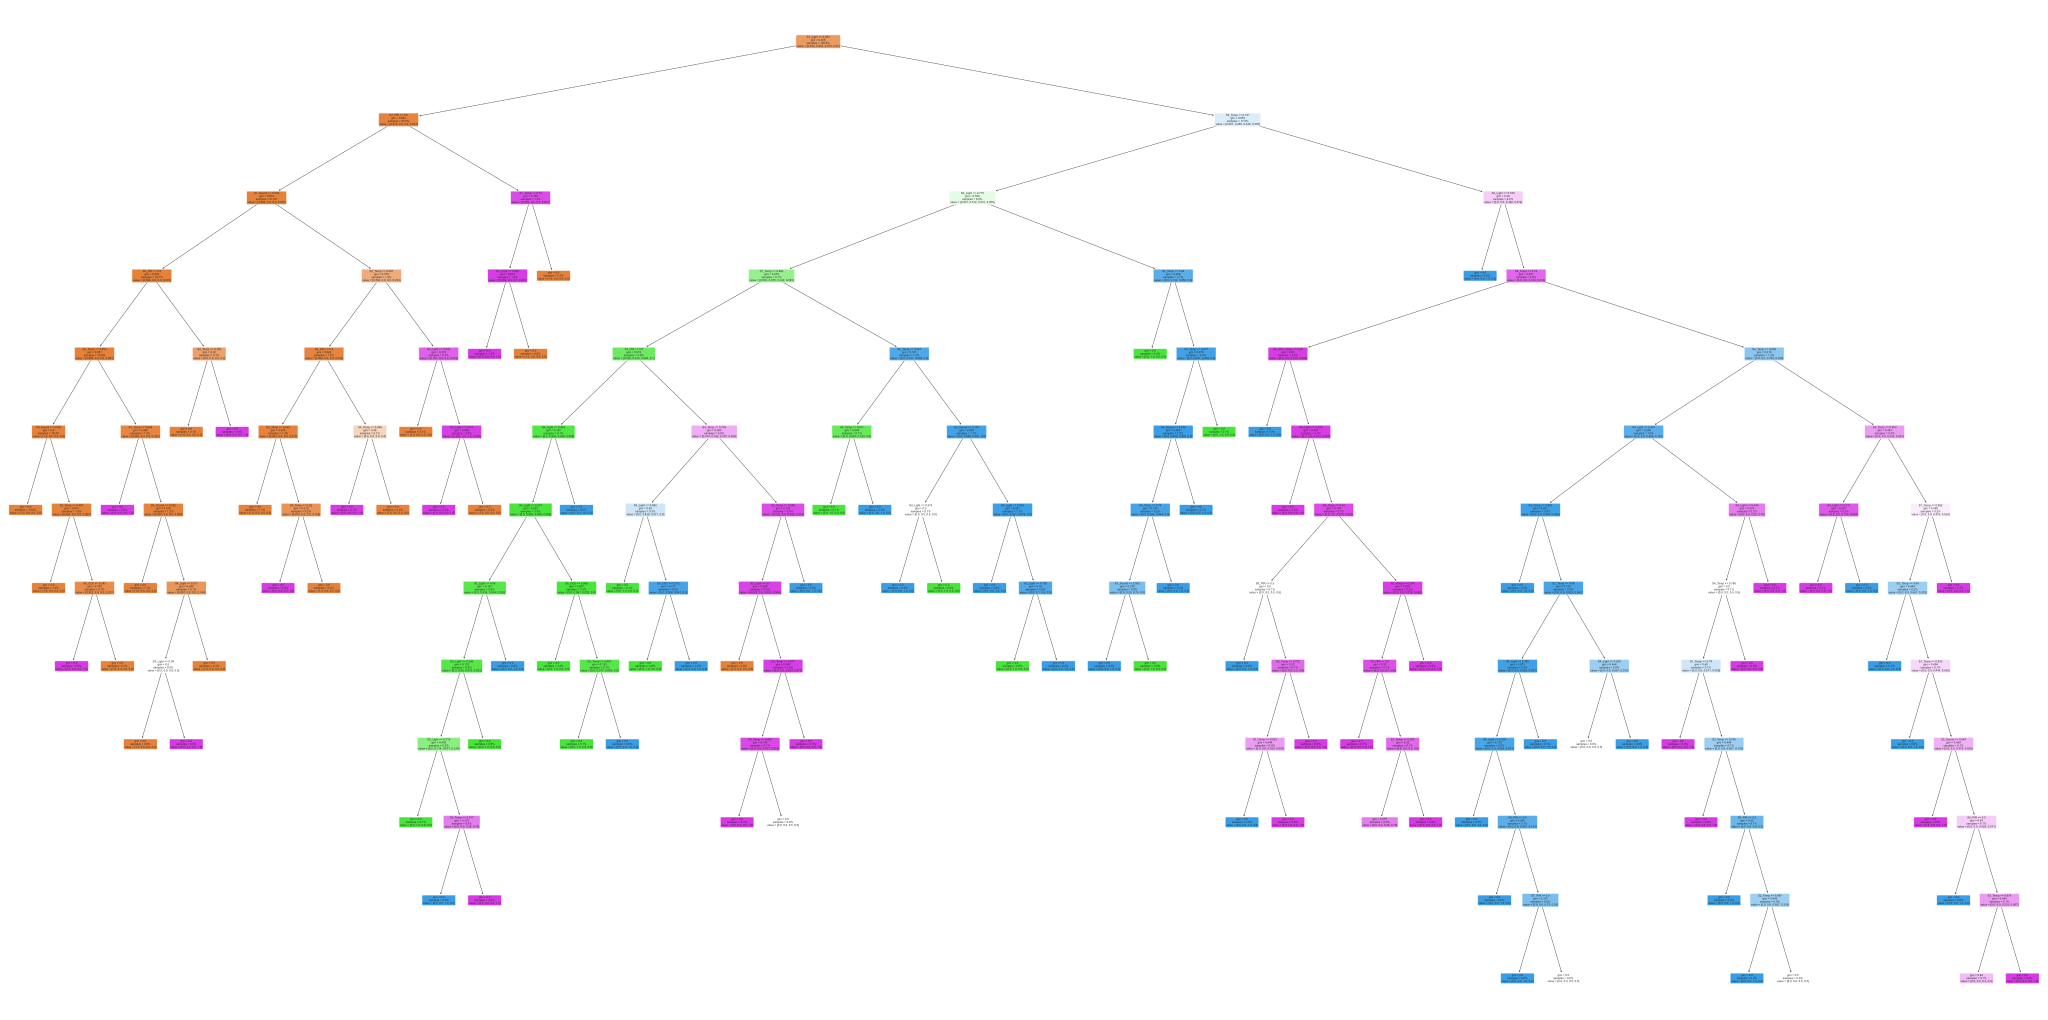

In [1032]:
from sklearn.tree import plot_tree

plt.figure(figsize=(100, 50))
plot_tree(dt_clf['decisiontreeclassifier'],
          feature_names=X_train.columns.tolist(),
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

### Performance Metrics:

In [1033]:
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_test,dt_pred)
f1 = f1_score(y_test,dt_pred, average='macro')
precision = precision_score(y_test,dt_pred, average='macro')
recall = recall_score(y_test,dt_pred, average='macro')

dt_perf = ["DT", acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 99.40769990128332%
The F1 Score of the model is 97.75441716541589%
The Precision Score of the model is 97.69119769119769%
The Recall Score of the model is 97.93595679012346%


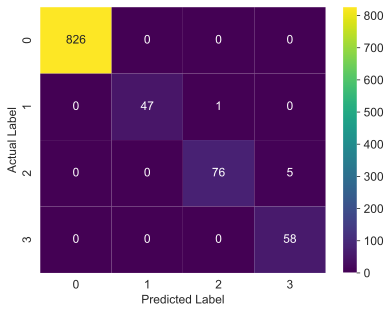

In [1034]:
confusionmatrix = confusion_matrix(y_test,dt_pred)
sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

# plt.ylabel('Rótulo Real')
# plt.xlabel('Rótulo Previsto')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Model Building - Random Forest Classifier

In [1035]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.98794921, 0.98769897, 0.99616718, 0.98793922, 0.98138322])

In [1036]:
rf_clf = make_pipeline(MinMaxScaler(), RandomForestClassifier())
rf_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

    S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  S2_Light  S3_Light  \
0  0.045091  0.057886  0.082651  0.018841  0.245957  0.136309  0.052646   

   S4_Light  S1_Sound  S2_Sound  S3_Sound  S4_Sound    S5_CO2  S5_CO2_Slope  \
0  0.060986  0.115784   0.05451  0.033484  0.005359  0.041857      0.001654   

     S6_PIR    S7_PIR  
0  0.019496  0.027489  


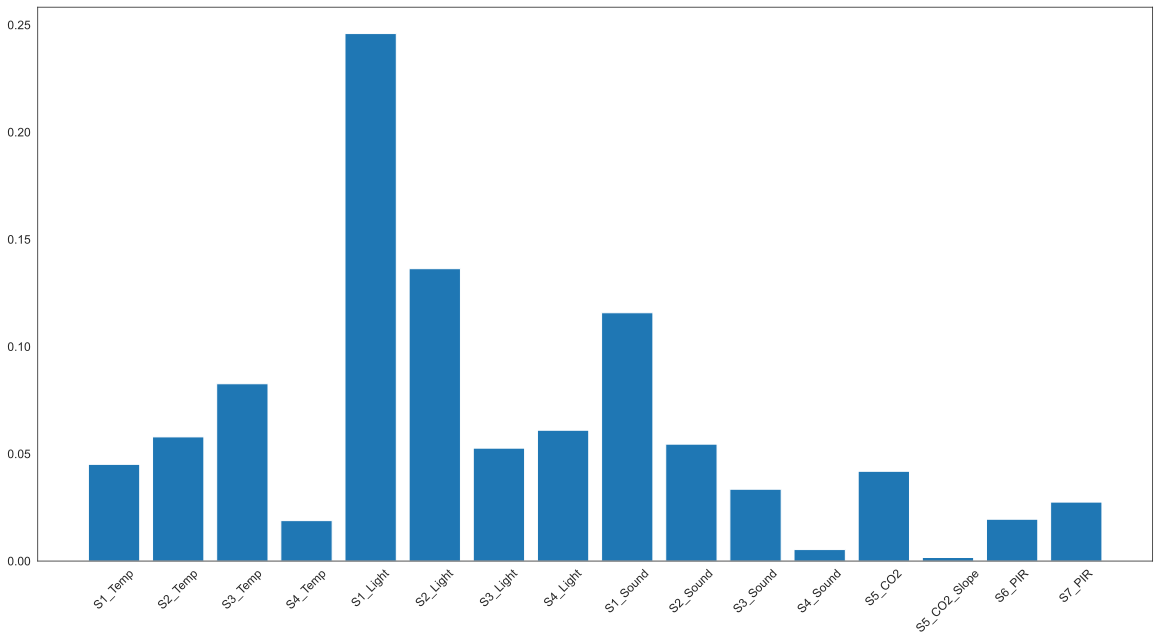

In [1037]:
rf_pred = rf_clf.predict(X_test)
# print(X_test.columns)
# print(rf_clf['randomforestclassifier'].feature_importances_)
array = rf_clf['randomforestclassifier'].feature_importances_
columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light',
       'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']
dataframe = pd.DataFrame(data=[array], columns=columns)
print(dataframe)
fig = plt.figure(figsize = (20, 10))
plt.bar(columns,  array)
plt.rcParams['font.size'] = 20
plt.xticks(rotation=45)

plt.show()

plt.rcParams['font.size'] = 12
# rf_clf['randomforestclassifier'].feature_importances_


### Performance Metrics:

In [1038]:
acc = accuracy_score(y_test,rf_pred)
f1 = f1_score(y_test,rf_pred, average='macro')
precision = precision_score(y_test,rf_pred, average='macro')
recall = recall_score(y_test,rf_pred, average='macro')

rf_perf = ["RF", acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 99.40769990128332%
The F1 Score of the model is 97.75441716541589%
The Precision Score of the model is 97.69119769119769%
The Recall Score of the model is 97.93595679012346%


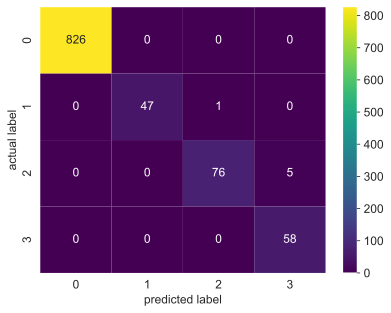

In [1039]:
confusionmatrix = confusion_matrix(y_test,rf_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# Naive Bayes

In [1040]:
from sklearn.naive_bayes import GaussianNB

pipeline = make_pipeline(MinMaxScaler(), GaussianNB())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.7191387 , 0.70101365, 0.69400437, 0.68457231, 0.68339133])

In [1041]:
nb_clf = make_pipeline(MinMaxScaler(), GaussianNB())
nb_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('gaussiannb', GaussianNB())])

In [1042]:
nb_pred = nb_clf.predict(X_test)

### Performance Metrics:

In [1043]:
acc = accuracy_score(y_test,nb_pred)
f1 = f1_score(y_test,nb_pred, average='macro')
precision = precision_score(y_test,nb_pred, average='macro')
recall = recall_score(y_test,nb_pred, average='macro')

nb_perf = ['NB', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 94.47186574531095%
The F1 Score of the model is 78.72358686866774%
The Precision Score of the model is 79.92384453781514%
The Recall Score of the model is 80.43348677815608%


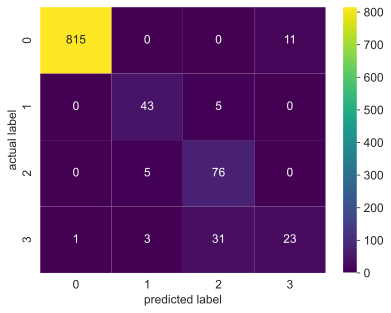

In [1044]:
confusionmatrix = confusion_matrix(y_test,nb_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# SVM - Support Vector Machine

In [1045]:
from sklearn.svm import SVC

pipeline = make_pipeline(MinMaxScaler(), SVC())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.9081096 , 0.86615514, 0.89293622, 0.87867985, 0.88650324])

In [1046]:
svc_clf = make_pipeline(MinMaxScaler(), SVC())
svc_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [1047]:
svc_pred = svc_clf.predict(X_test)

In [1048]:
acc = accuracy_score(y_test,svc_pred)
f1 = f1_score(y_test,svc_pred, average='macro')
precision = precision_score(y_test,svc_pred, average='macro')
recall = recall_score(y_test,svc_pred, average='macro')

svc_perf = ['SVM', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 97.92694965449161%
The F1 Score of the model is 92.27241791211537%
The Precision Score of the model is 92.38175254427128%
The Recall Score of the model is 92.21377367320287%


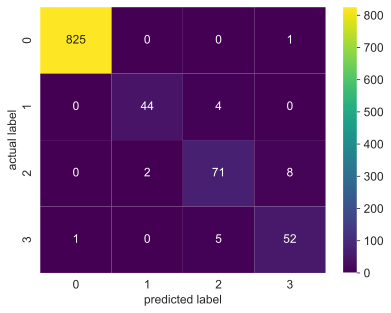

In [1049]:
confusionmatrix = confusion_matrix(y_test,svc_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# KNN - K NEAREST NEIGHBOUR ALGORITHM

In [1050]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = make_pipeline(MinMaxScaler(), KNeighborsClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.88968534, 0.86448379, 0.90059599, 0.86774109, 0.88932545])

In [1051]:
knn_clf = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
knn_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [1052]:
knn_pred = knn_clf.predict(X_test)

In [1053]:
acc = accuracy_score(y_test,knn_pred)
f1 = f1_score(y_test,knn_pred, average='macro')
precision = precision_score(y_test,knn_pred, average='macro')
recall = recall_score(y_test,knn_pred, average='macro')

knn_perf = ['knn', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 97.33464955577492%
The F1 Score of the model is 90.10926397223004%
The Precision Score of the model is 89.91815827939762%
The Recall Score of the model is 90.39551243793402%


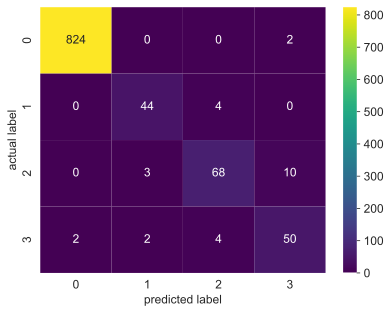

In [1054]:
confusionmatrix = confusion_matrix(y_test,knn_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# XGBoost - Extreme Gradient Boosting.

In [1055]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

pipeline = make_pipeline(MinMaxScaler(), XGBClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.98794921, 0.98880272, 0.99179374, 0.98659775, 0.98225687])

In [1056]:
xboost_clf = make_pipeline(MinMaxScaler(), XGBClassifier())
xboost_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [1057]:
xboost_pred = xboost_clf.predict(X_test)

In [1058]:
acc = accuracy_score(y_test,xboost_pred)
f1 = f1_score(y_test,xboost_pred, average='macro')
precision = precision_score(y_test,xboost_pred, average='macro')
recall = recall_score(y_test,xboost_pred, average='macro')

xboost_perf = ['xgboost', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 99.50641658440277%
The F1 Score of the model is 98.11734524991724%
The Precision Score of the model is 98.06658395368073%
The Recall Score of the model is 98.2445987654321%


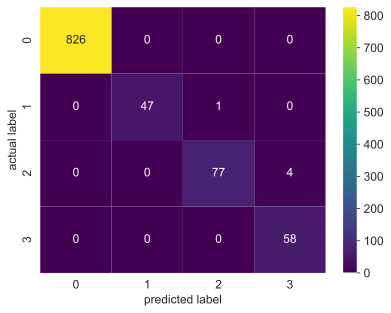

In [1059]:
confusionmatrix = confusion_matrix(y_test,xboost_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# Xboost - AdaBoost

In [1060]:
from sklearn.ensemble import AdaBoostClassifier

pipeline = make_pipeline(MinMaxScaler(), AdaBoostClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.76508711, 0.4355632 , 0.64737738, 0.72284933, 0.70233567])

In [1061]:
xboost_ada_clf = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
xboost_ada_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('adaboostclassifier', AdaBoostClassifier())])

In [1062]:
xboost_ada_pred = xboost_ada_clf.predict(X_test)

In [1063]:
acc = accuracy_score(y_test,xboost_ada_pred)
f1 = f1_score(y_test,xboost_ada_pred, average='macro')
precision = precision_score(y_test,xboost_ada_pred, average='macro')
recall = recall_score(y_test,xboost_ada_pred, average='macro')

xboost_ada_perf = ['ada', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 85.88351431391905%
The F1 Score of the model is 61.021117141861794%
The Precision Score of the model is 63.47095907308595%
The Recall Score of the model is 63.20436894479852%


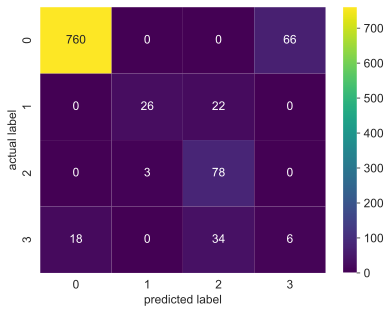

In [1064]:
confusionmatrix = confusion_matrix(y_test,xboost_ada_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# Neural Networks

In [1065]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(MinMaxScaler(), MLPClassifier(solver="lbfgs"))

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.9552403 , 0.94527654, 0.96716166, 0.94607573, 0.95645585])

In [1066]:
mlp_clf = make_pipeline(MinMaxScaler(), MLPClassifier(solver="lbfgs"))
mlp_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('mlpclassifier', MLPClassifier(solver='lbfgs'))])

In [1067]:
mlp_pred = mlp_clf.predict(X_test)

In [1068]:
acc = accuracy_score(y_test,mlp_pred)
f1 = f1_score(y_test,mlp_pred, average='macro')
precision = precision_score(y_test,mlp_pred, average='macro')
recall = recall_score(y_test,mlp_pred, average='macro')

mlp_perf = ['mlp', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 97.82823297137216%
The F1 Score of the model is 92.159091789911%
The Precision Score of the model is 92.31466222533895%
The Recall Score of the model is 92.1173230559189%


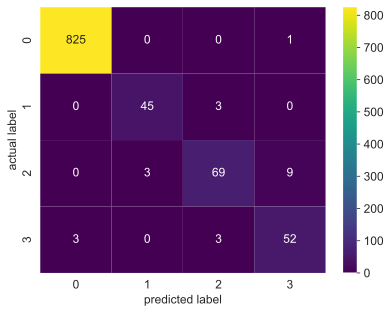

In [1069]:
confusionmatrix = confusion_matrix(y_test,mlp_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# Extra trees

In [1070]:
from sklearn.ensemble import ExtraTreesClassifier

pipeline = make_pipeline(MinMaxScaler(), ExtraTreesClassifier())

# cross validation
cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_macro')

array([0.98306575, 0.98439258, 0.99233165, 0.98193617, 0.97402203])

In [1071]:
etc_clf = make_pipeline(MinMaxScaler(), ExtraTreesClassifier())
etc_clf.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('extratreesclassifier', ExtraTreesClassifier())])

In [1072]:
etc_pred = etc_clf.predict(X_test)

In [1073]:
acc = accuracy_score(y_test,etc_pred)
f1 = f1_score(y_test,etc_pred, average='macro')
precision = precision_score(y_test,etc_pred, average='macro')
recall = recall_score(y_test,etc_pred, average='macro')

etc_perf = ['etc', acc, f1, precision, recall]

print(f'The Accuracy Score of the model is {acc*100}%')
print(f'The F1 Score of the model is {f1 * 100}%')
print(f'The Precision Score of the model is {precision * 100}%')
print(f'The Recall Score of the model is {recall * 100}%')

The Accuracy Score of the model is 99.40769990128332%
The F1 Score of the model is 97.74892193719593%
The Precision Score of the model is 97.72774434529985%
The Recall Score of the model is 97.81356428267348%


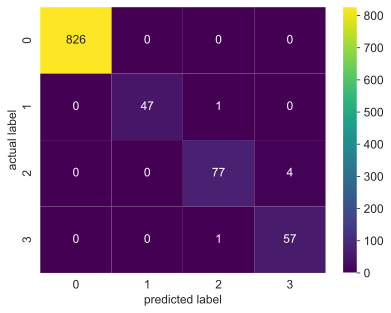

In [1074]:
confusionmatrix = confusion_matrix(y_test,etc_pred)

sns.heatmap(confusionmatrix,annot=True,fmt='d',cmap='viridis')

plt.ylabel('actual label')
plt.xlabel('predicted label')
plt.show()

# Plot results

     Model       acc        f1  precision    recall
0       DT  0.994077  0.977544   0.976912  0.979360
1       RF  0.994077  0.977544   0.976912  0.979360
2       NB  0.944719  0.787236   0.799238  0.804335
3      SVM  0.979269  0.922724   0.923818  0.922138
4      knn  0.973346  0.901093   0.899182  0.903955
5  xgboost  0.995064  0.981173   0.980666  0.982446
6      ada  0.858835  0.610211   0.634710  0.632044
7      mlp  0.978282  0.921591   0.923147  0.921173
8      etc  0.994077  0.977489   0.977277  0.978136


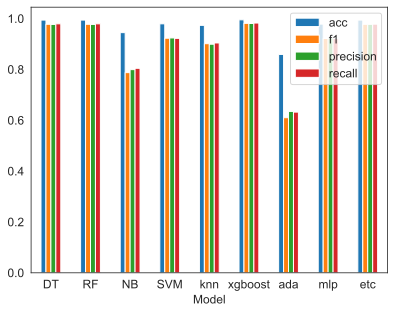

In [1075]:
data = [dt_perf, rf_perf, nb_perf, svc_perf, knn_perf, xboost_perf, xboost_ada_perf, mlp_perf, etc_perf]
dataframe_to_plot = pd.DataFrame(data, columns=['Model','acc', 'f1', 'precision', 'recall'])
print(dataframe_to_plot)
# dataframe_to_plot.plot(x="Model")
# sns.catplot(data=dataframef, kind = "bar", hue='Model', x='Model', y=['Model','acc', 'f1', 'precision', 'recall'])
dataframe_to_plot.set_index('Model').plot.bar(rot=0)
plt.show()